In [1]:
import pandas as pd
df = pd.read_csv('sd.csv')

In [2]:
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [3]:
df.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [4]:
df['TRANSMISSION'].value_counts()

TRANSMISSION
A4     324
M5     191
A5      73
M6      23
AS4     12
A3      10
AS5      5
AS6      1
Name: count, dtype: int64

In [6]:
# Encode the transmission column and retain the original column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TRANSMISSION_LABEL'] = le.fit_transform(df['TRANSMISSION'])
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS,TRANSMISSION_LABEL
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216,1
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205,6
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265,4
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301,1
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230,1


In [5]:
df['FUEL'].value_counts()

FUEL
X    454
Z    176
D      6
E      2
N      1
Name: count, dtype: int64

<Axes: >

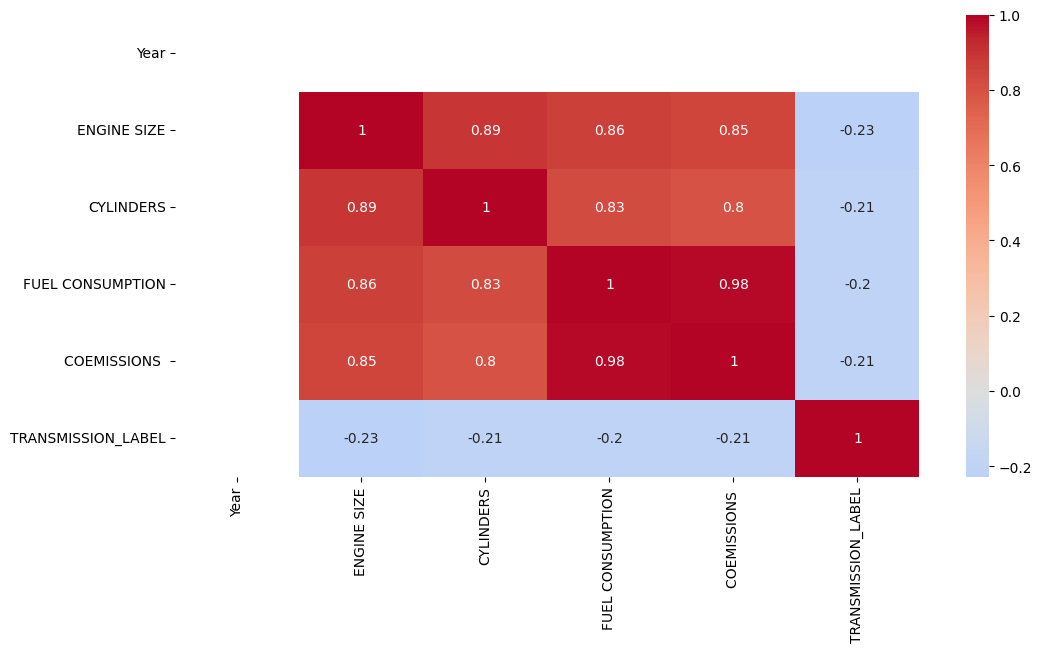

In [9]:
# columns Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
    #    'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
    #   dtype='object')

# the column to be predicted is Fuel Consumption.

#now we need to see which columns correlate with fuel Consumption
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

cols_to_corr = ['Year', 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS ', 'TRANSMISSION_LABEL']
sns.heatmap(df[cols_to_corr].corr(), annot=True, cmap='coolwarm', center=0)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df[cols_to_corr]
y = df['FUEL CONSUMPTION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
#accuracy
# print(lr.score(X_test, y_test))


Mean Squared Error: 8.891119785928488e-30


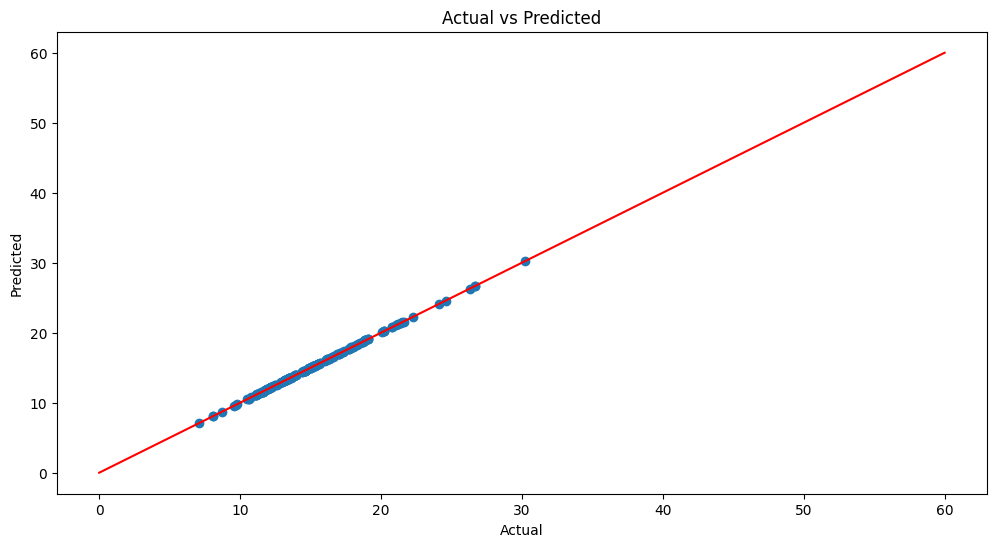

In [24]:
# plot the line of best fit for the test data
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([0, 60], [0, 60], color='red')
plt.show()

In [25]:
# predict
# year, engine size, cylinders, fuel consumption, coemissions, transmission

# 2014, 2.0, 4, 8.5, 200, 1
year = 2014
engine_size = 2.0
cylinders = 4
fuel_consumption = 8.5
coemissions = 200
transmission = 2

#predict the cosumption
consumption = lr.predict([[year, engine_size, cylinders, fuel_consumption, coemissions, transmission]])
print('Predicted Fuel Consumption:', consumption[0])

Predicted Fuel Consumption: 8.5


d:\.MCA\sem4\ml\.env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
